In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
#from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.resnet_v2 import ResNet152V2, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#from tensorflow.keras.applications.mobilenet_v3 import MobileNetV3
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg19 import VGG19

In [ ]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/plant village dataset-custom'
valid_path = '/content/drive/MyDrive/plant village dataset-custom'

In [ ]:
vgg19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
for layer in vgg19.layers:
    layer.trainable = False

In [ ]:
folders = glob('/content/drive/MyDrive/plant village dataset-custom/*')

In [ ]:
x = Flatten()(vgg19.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=vgg19.input, outputs=prediction)


In [ ]:
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)


In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/plant village dataset-custom',
                                                 target_size = (224, 224),
                                                 batch_size = 64,
                                                 class_mode = 'categorical')

Found 1530 images belonging to 12 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/plant village dataset-custom',
                                            target_size = (224, 224),
                                            batch_size = 64,
                                            class_mode = 'categorical')


Found 1530 images belonging to 12 classes.


In [ ]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=2,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-13-962440d9f58c>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/2
24/24 [==============================] - 1853s 78s/step - loss: 1.8318 - accuracy: 0.4438 - val_loss: 0.7651 - val_accuracy: 0.7320
Epoch 2/2
24/24 [==============================] - 1825s 78s/step - loss: 0.6335 - accuracy: 0.7954 - val_loss: 0.4037 - val_accuracy: 0.8725


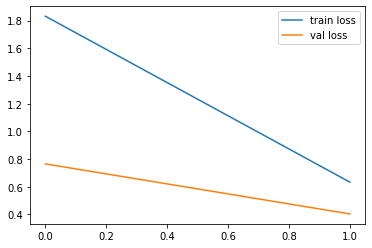

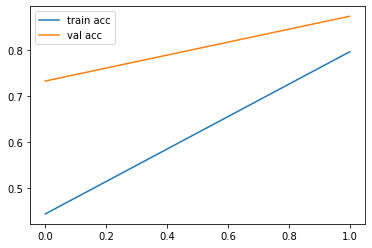

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
from tensorflow.keras.models import load_model

model.save('/content/drive/MyDrive/Plant Doc Dataset-Yolo V7/vgg19model.h5')

In [ ]:
y_pred = model.predict(test_set)

24/24 [==============================] - 885s 37s/step


In [ ]:
model.accuracy

In [ ]:
y_pred

array([[1.0186223e-01, 1.2187439e-02, 2.5199022e-02, ..., 1.9353550e-02,
        1.4673067e-06, 1.9361858e-03],
       [2.4611926e-01, 5.6201746e-03, 3.4320708e-02, ..., 3.1913099e-01,
        4.6345112e-03, 9.3249930e-03],
       [1.9458175e-03, 6.8164576e-04, 8.2248845e-04, ..., 2.5757829e-02,
        2.8339140e-03, 2.4389324e-03],
       ...,
       [8.0773756e-02, 6.0583828e-03, 1.5014005e-02, ..., 5.6292094e-02,
        2.9255130e-04, 1.9695295e-02],
       [6.1939478e-05, 1.4565693e-05, 7.2911098e-05, ..., 1.8389581e-02,
        2.4719338e-04, 9.7927058e-01],
       [1.7382834e-02, 1.7711993e-02, 1.9513860e-01, ..., 9.5383197e-02,
        1.2367740e-05, 4.7468193e-02]], dtype=float32)

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred
l=['apple scab','apple black rot','cedar apple rust','apple healthy','blueberry healthy','cherry powdery mildew','cherry healthy','corn cercospora leaf gray leaf spot','corn common rust','corn northern leaf blight','corn healthy','grape black rot','grape black measles','grape leaf blight','grape healthy','orange haunglongbing',
      'peach bacterial spot','peach healthy','pepper bell Bacterial spot','pepper bell healthy','potato early blight','potato late blight','potato healthy','raspberry healthy','soybean healthy','squash powdery mildew','strawberry leaf scotch','strawberry healthy','tomato bacterial spot','tomato early blight','tomato late blight','tomato leaf mold','tomato septoria leaf spot','tomato spider mites two spotted spider mite',
      'tomato target spot','Tomato yellow leaf curl virus','tomato mosaic virus','tomato healthy']
for i in y_pred:
     print(l[i], end=' ')

cherry healthy corn northern leaf blight corn common rust grape black rot corn cercospora leaf gray leaf spot corn healthy apple scab apple healthy apple healthy cherry healthy cedar apple rust cedar apple rust corn northern leaf blight apple black rot corn healthy cedar apple rust corn northern leaf blight cherry powdery mildew cherry powdery mildew cherry powdery mildew cherry healthy cedar apple rust grape black rot apple black rot cherry powdery mildew cherry healthy apple healthy cedar apple rust corn common rust corn cercospora leaf gray leaf spot apple scab apple scab grape black rot apple scab corn healthy cherry powdery mildew grape black rot corn northern leaf blight apple black rot corn northern leaf blight grape black rot corn healthy cedar apple rust apple healthy apple black rot cherry powdery mildew apple healthy blueberry healthy apple black rot grape black rot corn healthy blueberry healthy corn northern leaf blight corn northern leaf blight apple healthy corn northern